In [1]:
import tensorflow as tf

from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.datasets import imdb

import numpy as np

import matplotlib.pyplot as plt

## Load and visualize the data set
---
The imdb dataset is a set of 50,000 highly polarized reviews from the Internet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews. 

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

The argument num_words=10000 means you’ll only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded. This allows you to work with vector data of manageable size.

In [3]:
print(f"Train data shape: {train_data.shape}")

print(f"Train labels shape: {train_labels.shape}")
print(f"Test data shape : {test_data.shape}")
print(f"Test labels shape: {test_labels.shape}")

print(train_data[0])

Train data shape: (25000,)
Train labels shape: (25000,)
Test data shape : (25000,)
Test labels shape: (25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 

To decode a review, we need the dictionary of the words, and then we need to decode the review using it.


In [4]:
words_index = imdb.get_word_index()

reverse_words = dict([(value, key) for (key, value) in words_index.items()])
#print(words_index)

#print(reverse_words)
decoded_review = ' '.join([reverse_words.get(i-3 , '\n') for i in train_data[1]])

print(decoded_review)

1646592/1641221 [==============================] - 0s 0us/step

 big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal 
 the hair is big lots of boobs 
 men wear those cut 
 shirts that show off their 
 sickening that men actually wore them and the music is just 
 trash that plays over and over again in almost every scene there is trashy music boobs and 
 taking away bodies and the gym still doesn't close for 
 all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back 

In [5]:
print(train_labels[:10])

[1 0 0 1 0 0 1 0 1 0]


## Define a function to vectorize the input data
---
We need to standarize the data so that it can be fed to the neural network. We create a $n \times m$ matrix, where each row represents a review, and each column represents a word from the dictionary. We are going to one-hot encode the data: turn each word of the review to a 0 or 1 in the row of the matrix.

In [6]:
# in the review, the word exists, is converted to 1, and if it doesn't exist is 0
# como cada review tiene diferentes palabras, queremos estandarizar los datos. 
# 1 se la palabra existe en el review
# 0 si la palabra no existe en el review
def vectorize_sequences(sequences, dimension):

  results = np.zeros((len(sequences), dimension))

  for  i, sequence in enumerate(sequences):
    #lo que esta 
    results [i, sequence] = 1
  return results 


x_train = vectorize_sequences(train_data, 10000)
x_test = vectorize_sequences(test_data, 10000)
print(x_train)
print(x_train.shape)
print(x_test)
print(x_test.shape)



[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
(25000, 10000)
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
(25000, 10000)


Since the label are already rows with 0 and 1, we only need to turn them to numpy arrays.

## Define and compile the model
---
The input data is vectors, and the labels are scalars (1s and 0s): this is the easiest setup you’ll ever encounter. A type of network that performs well on such a problem is a simple stack of fully connected (Dense) layers. There are two key architecture decisions to be made about such a stack of Dense layers:
- How many layers to use
- How many hidden units to choose for each layer

In [7]:
print(train_labels)
print(test_labels)

y_train = np.asarray(train_labels) # no son test de validacion
y_test = np.asarray(test_labels) #

print(y_test.shape)
print(y_train.shape)

[1 0 0 ... 0 1 0]
[0 1 1 ... 0 0 0]
(25000,)
(25000,)


In [8]:
network = models.Sequential()

network.add(layers.Dense(16, activation='sigmoid', input_shape=(10000,), name='hidden_1'))

network.add(layers.Dense(16, activation='sigmoid', name='hidden_2'))
network.add(layers.Dense(1, activation='sigmoid', name='output'))

network.compile(optimizer=optimizers.SGD(learning_rate=0.005), loss='binary_crossentropy', metrics=['accuracy'])
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 16)                160016    
_________________________________________________________________
hidden_2 (Dense)             (None, 16)                272       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


### Validating the model
---
In order to monitor during training the accuracy of the model on data it has never seen before, we create a validation set by setting apart 15,000 samples from the original training data.

In [9]:
# separar datos entre entrenamiento y validacion 
x_val = x_train[15000:]
y_val = y_train[15000:]

partial_x_train = x_train[:15000]
partial_y_train = y_train[:15000]

history = network.fit(partial_x_train, partial_y_train, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
469/469 [==============================] - 4s 6ms/step - loss: 0.7118 - accuracy: 0.4978 - val_loss: 0.6932 - val_accuracy: 0.5033
Epoch 2/50
469/469 [==============================] - 3s 5ms/step - loss: 0.6930 - accuracy: 0.5095 - val_loss: 0.6927 - val_accuracy: 0.5251
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 0.6925 - accuracy: 0.5237 - val_loss: 0.6924 - val_accuracy: 0.5712
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.6922 - accuracy: 0.5573 - val_loss: 0.6921 - val_accuracy: 0.6179
Epoch 5/50
469/469 [==============================] - 3s 5ms/step - loss: 0.6919 - accuracy: 0.5703 - val_loss: 0.6919 - val_accuracy: 0.5005
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.6915 - accuracy: 0.5698 - val_loss: 0.6914 - val_accuracy: 0.6274
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.6911 - accuracy: 0.6026 - val_loss: 0.6910 - val_accuracy: 0.6001
Epoch 

### Training and plotting results
---
Exagerating the training epochs to showcase overfitting.

In [10]:

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

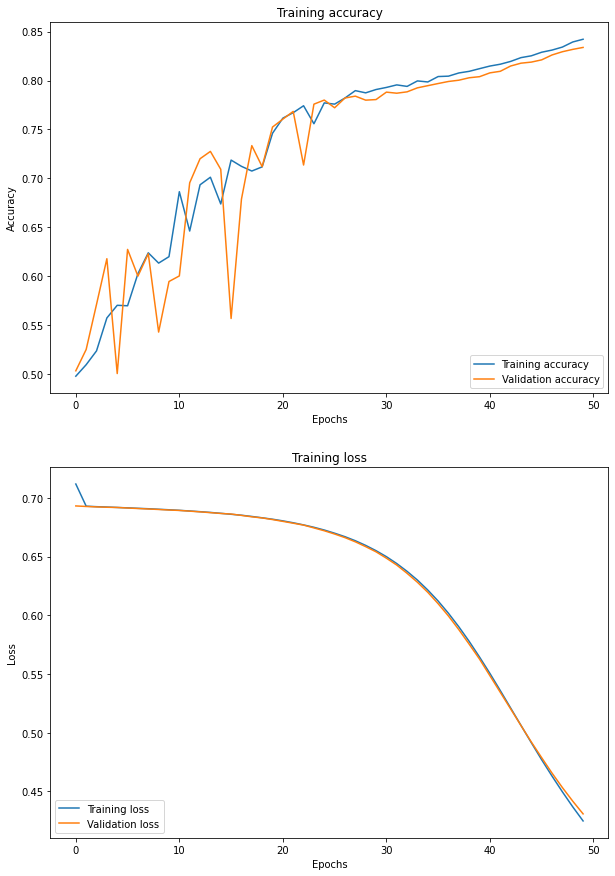

In [11]:
fig, ax = plt.subplots(2, 1, figsize=(10, 15))
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].plot(acc_values, label="Training accuracy")
ax[0].plot(val_acc_values, label="Validation accuracy")
ax[0].set_title("Training accuracy")
ax[0].legend(loc='lower right')

ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].plot(loss_values, label="Training loss")
ax[1].plot(val_loss_values, label="Validation loss")
ax[1].set_title("Training loss")
ax[1].legend(loc='lower left')
